In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [4]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
X=data.data
y=data.target

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [8]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
print(lr.coef_)
print(lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [11]:
y_pred=lr.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
print("R2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_score: 0.5188113124539246
RMSE: 48.727137609532534


### Applying Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)

#### Where alpha is The value of Lambda(Hyperparameter)

In [18]:
R.fit(X_train,y_train)

Ridge(alpha=100000)

In [19]:
y_pred1=R.predict(X_test)

In [21]:
print("R2_score:",r2_score(y_test,y_pred1))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2_score: -0.00042490200441935855
RMSE: 70.25956272917782


### From above you can see the difference between R2_score & RMSE of model before and after the applying the Ridge Regression , After applying ridge_regression R2_score of model Decreases and RMSE increases.

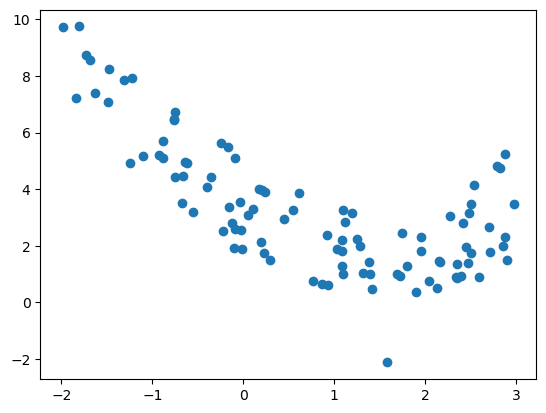

In [23]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.randn(m,1)

plot.scatter(x1,x2)
plot.show()

### From the above graph you can see that graph is not linear and Linear Regression will not work optimally on the above data

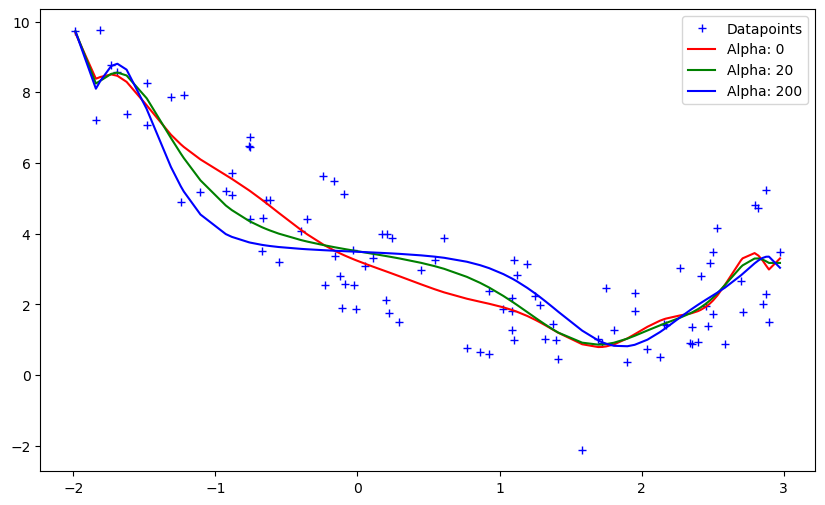

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plot.figure(figsize=(10, 6))
plot.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plot.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plot.legend()
plot.show()

## From the above graph<br> We have take 3 values of Alpha Such as <br> 0 (Red)->For Overfitting <br>20 (Green)->For Perfect Fit (Optimum one)<br> 200 (Blue)->For Underfitting

# <hr>

# Conclude